<a href="https://colab.research.google.com/github/C9342-mhmt/Assignment/blob/main/Heart_Stroke_Prediction_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score

from scipy.stats import skew

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest the data to notebook

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000,303.000
mean,54.366,0.683,0.967,131.624,246.264,0.149,0.528,149.647,0.327,1.040,1.399,0.729,2.314,0.545
std,9.082,0.466,1.032,17.538,51.831,0.356,0.526,22.905,0.470,1.161,0.616,1.023,0.612,0.499
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,47.500,0.000,0.000,120.000,211.000,0.000,0.000,133.500,0.000,0.000,1.000,0.000,2.000,0.000
50%,55.000,1.000,1.000,130.000,240.000,0.000,1.000,153.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,274.500,0.000,1.000,166.000,1.000,1.600,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [9]:
df.shape

(303, 14)

# EDA

In [11]:
df = df.astype({"cp": str,"fbs": str, "restecg":str, "exang":str,"slope":str, "thal":str, })

In [12]:
df = pd.get_dummies(df, drop_first= True )

In [13]:
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [14]:
df[df.duplicated() == True]

,age,sex,trestbps,chol,thalach,oldpeak,ca,target,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
164,38,1,138,175,173,0.000,4,1,0,1,0,0,1,0,0,0,1,0,1,0


In [15]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(302, 20)

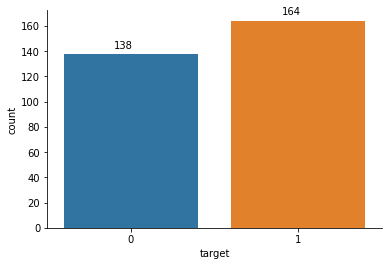

In [18]:
ax = sns.countplot(df.target)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

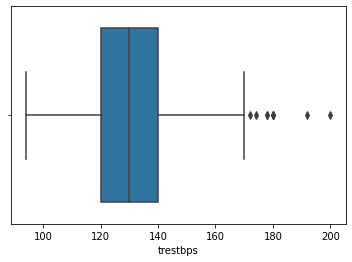

In [19]:
sns.boxplot(df.trestbps);


In [ ]:
df[df.trestbps > 170]


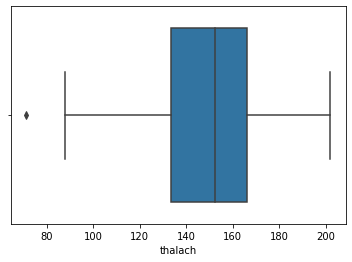

In [22]:
sns.boxplot(df.thalach);


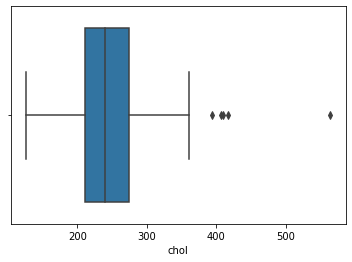

In [21]:
sns.boxplot(df.chol);


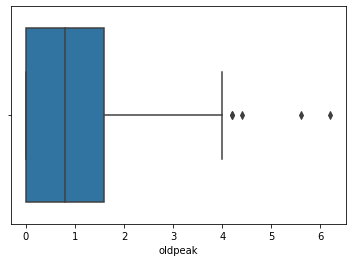

In [23]:
sns.boxplot(df.oldpeak);


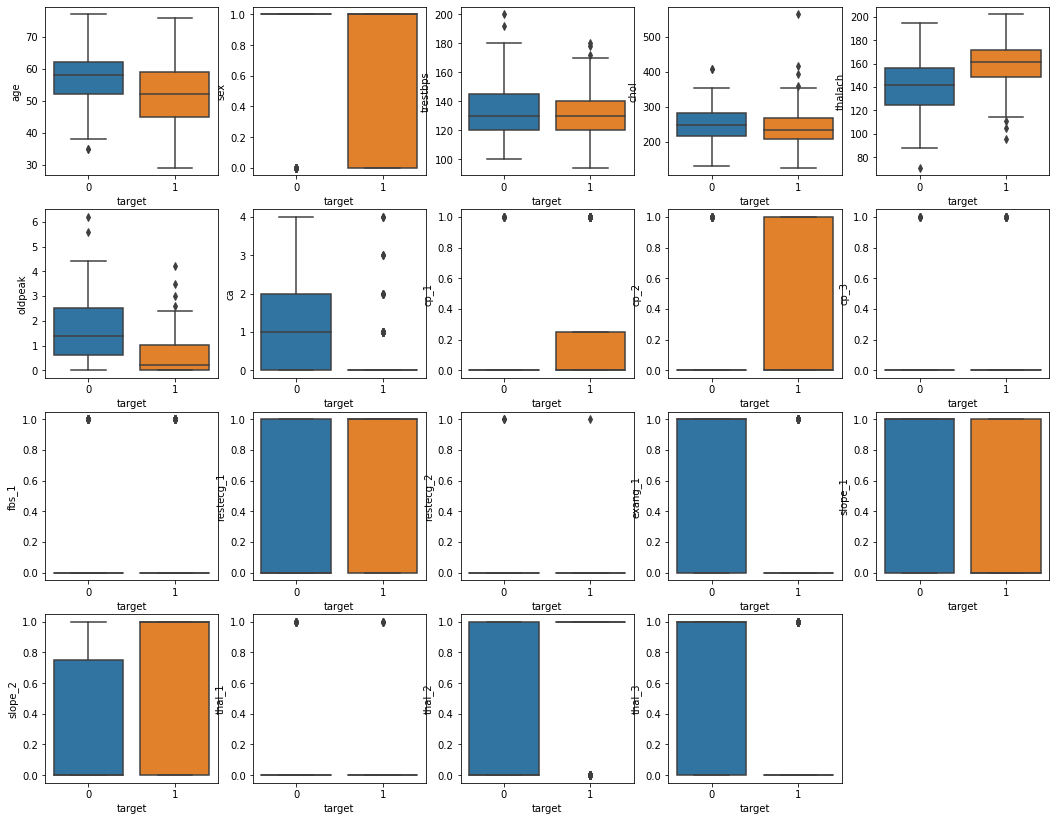

In [26]:
index = 0
plt.figure(figsize=(18,18))
for feature in df.columns :
    if feature != 'target' :
        index += 1
        plt.subplot(5,5,index)
        sns.boxplot(x = 'target', y = feature, data = df)

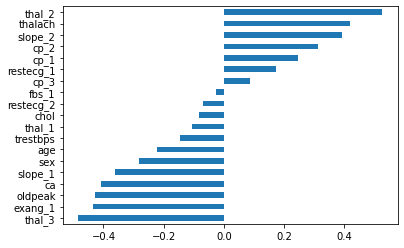

In [27]:
df.corr()["target"].drop("target").sort_values().plot.barh();


In [28]:
df_cont = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']]
df_cont

,age,trestbps,chol,thalach,oldpeak,target
0,63,145,233,150,2.300,1
1,37,130,250,187,3.500,1
2,41,130,204,172,1.400,1
3,56,120,236,178,0.800,1
4,57,120,354,163,0.600,1
...,...,...,...,...,...,...
298,57,140,241,123,0.200,0
299,45,110,264,132,1.200,0
300,68,144,193,141,3.400,0
301,57,130,131,115,1.200,0


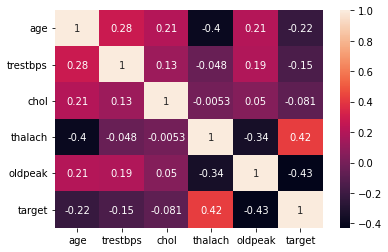

In [29]:
sns.heatmap(df_cont.corr(), annot = True);

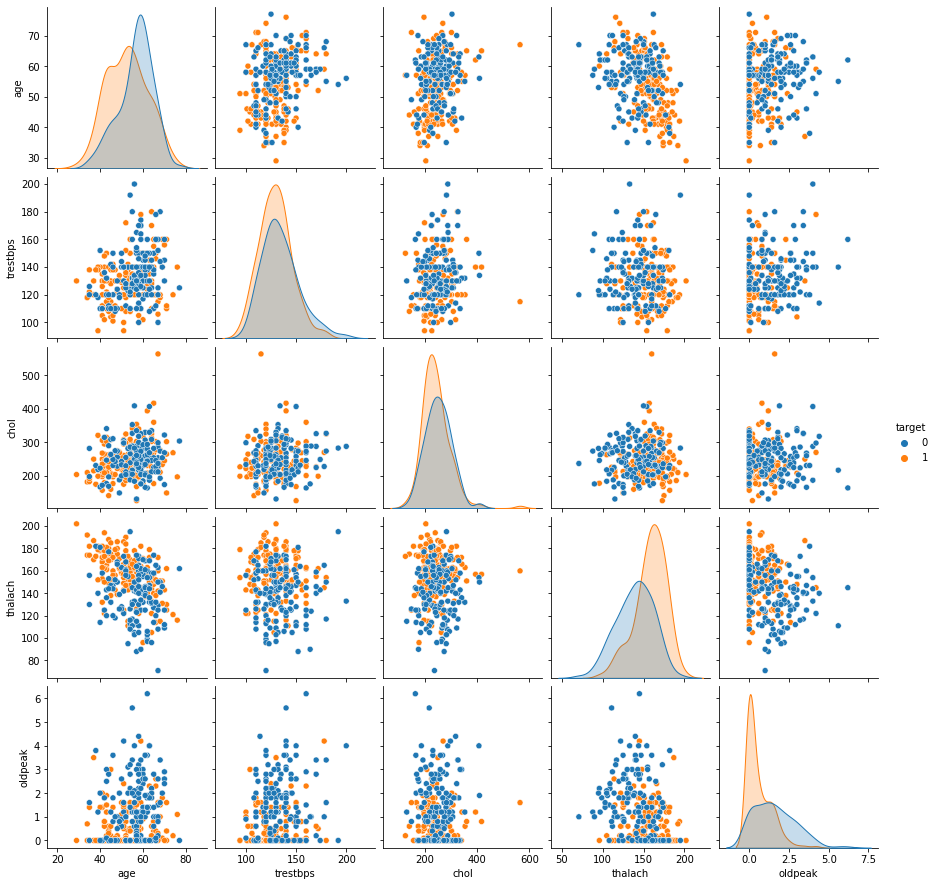

In [30]:
sns.pairplot(df_cont, hue = 'target');

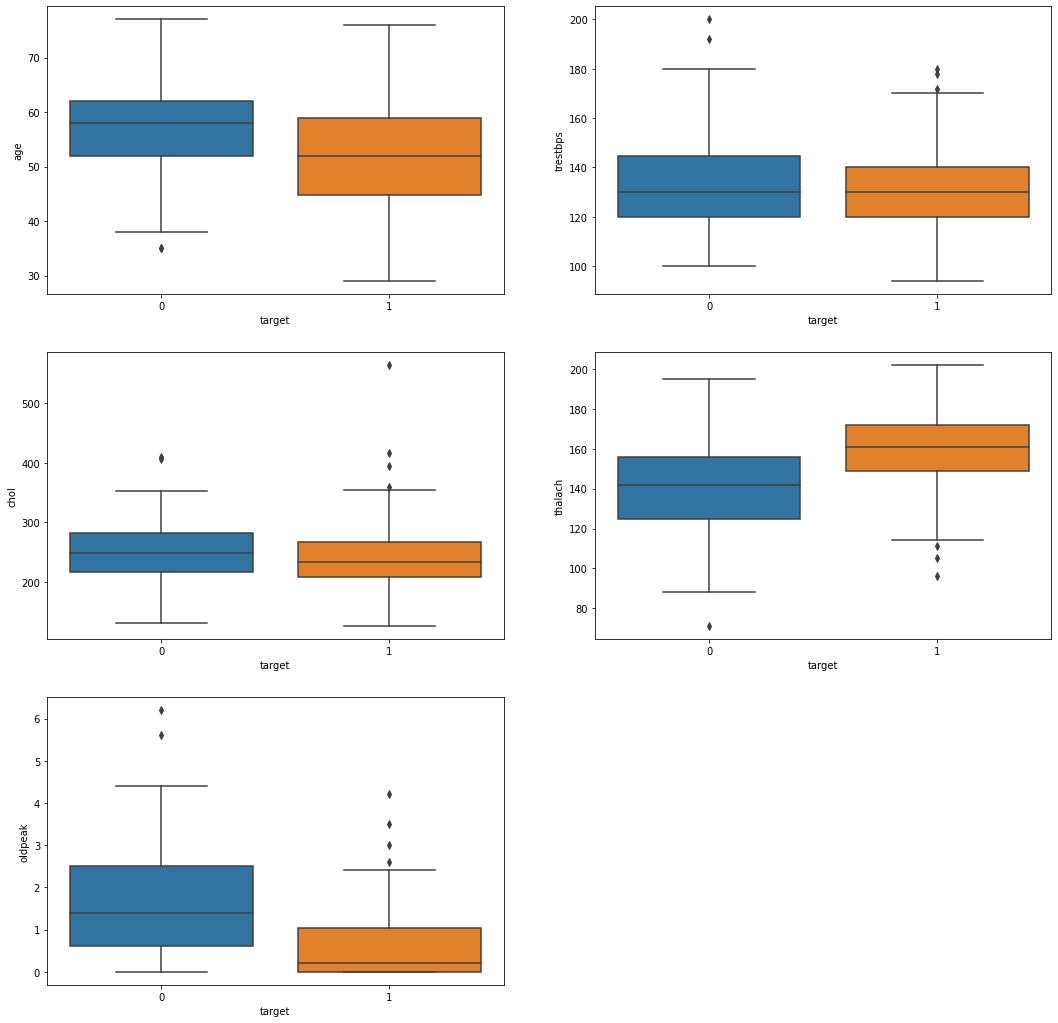

In [31]:
index = 0
plt.figure(figsize=(18,18))
for feature in df_cont.columns :
    if feature != 'target' :
        index += 1
        plt.subplot(3,2,index)
        sns.boxplot(x = 'target', y = feature, data = df_cont)

# Data Preprocessing

In [34]:
X = df.drop('target', axis = 1)
y = df.target

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 42)

In [36]:
scaler = MinMaxScaler()

In [37]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[0.58333333, 0.        , 0.32075472, ..., 0.        , 1.        ,
        0.        ],
       [0.77083333, 1.        , 0.62264151, ..., 1.        , 0.        ,
        0.        ],
       [0.54166667, 0.        , 0.32075472, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.72916667, 1.        , 0.32075472, ..., 0.        , 0.        ,
        1.        ],
       [0.1875    , 1.        , 0.41509434, ..., 0.        , 1.        ,
        0.        ],
       [0.27083333, 1.        , 0.33962264, ..., 0.        , 1.        ,
        0.        ]])

In [38]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.58333333, 1.        , 0.52830189, ..., 1.        , 0.        ,
        0.        ],
       [0.79166667, 1.        , 0.29245283, ..., 0.        , 0.        ,
        1.        ],
       [0.35416667, 1.        , 0.43396226, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.52083333, 1.        , 0.1509434 , ..., 0.        , 0.        ,
        1.        ],
       [0.60416667, 1.        , 0.52830189, ..., 0.        , 0.        ,
        1.        ],
       [0.41666667, 1.        , 0.33962264, ..., 0.        , 1.        ,
        0.        ]])

# Implement Logistic Regression and Evaluate

In [39]:
from sklearn.linear_model import LogisticRegression


In [40]:
log_model = LogisticRegression()


In [41]:
log_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [42]:
log_model.coef_

array([[-0.31112984, -0.76543311, -0.52188876, -1.13793583,  0.77228096,
        -1.10537355, -1.35706355,  0.86852732,  1.40318343,  1.27669771,
        -0.01656519,  0.62533482, -0.15707873, -0.87699062, -0.38406858,
         0.41504659, -0.22585802,  0.90707927, -0.7904142 ]])

In [43]:
log_model.intercept_

array([0.78507665])

In [44]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [45]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba 

array([[0.94328229, 0.05671771],
       [0.84101541, 0.15898459],
       [0.96337506, 0.03662494],
       [0.23143815, 0.76856185],
       [0.46439102, 0.53560898],
       [0.86561452, 0.13438548],
       [0.05114015, 0.94885985],
       [0.53787964, 0.46212036],
       [0.02569791, 0.97430209],
       [0.65765358, 0.34234642],
       [0.86656157, 0.13343843],
       [0.48341845, 0.51658155],
       [0.93180204, 0.06819796],
       [0.0565354 , 0.9434646 ],
       [0.02886138, 0.97113862],
       [0.17045659, 0.82954341],
       [0.04385524, 0.95614476],
       [0.32702755, 0.67297245],
       [0.13594005, 0.86405995],
       [0.45955178, 0.54044822],
       [0.18217659, 0.81782341],
       [0.60439308, 0.39560692],
       [0.06409649, 0.93590351],
       [0.16535638, 0.83464362],
       [0.12955308, 0.87044692],
       [0.91189219, 0.08810781],
       [0.83142642, 0.16857358],
       [0.33666033, 0.66333967],
       [0.75037528, 0.24962472],
       [0.69792248, 0.30207752],
       [0.

In [46]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data

,age,sex,trestbps,chol,thalach,oldpeak,ca,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target
179,57,1,150,276,112,0.600,1,0,0,0,0,0,0,1,1,0,1,0,0,0
197,67,1,125,254,163,0.200,2,0,0,0,1,1,0,0,1,0,0,0,1,0
285,46,1,140,311,120,1.800,2,0,0,0,0,1,0,1,1,0,0,0,1,0
194,60,1,140,185,155,3.000,0,0,1,0,0,0,0,0,1,0,0,1,0,0
188,50,1,140,233,163,0.600,1,0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,58,0,150,283,162,1.000,0,0,0,1,1,0,0,0,0,1,0,1,0,1
4,57,0,120,354,163,0.600,0,0,0,0,0,1,0,1,0,1,0,1,0,1
224,54,1,110,239,126,2.800,1,0,0,0,0,1,0,1,1,0,0,0,1,0
202,58,1,150,270,111,0.800,0,0,0,0,0,0,0,1,0,1,0,0,1,0


In [48]:
test_data['pred_proba'] = y_pred_proba[:,1] 
test_data['pred'] = y_pred    
test_data 

,age,sex,trestbps,chol,thalach,oldpeak,ca,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target,pred_proba,pred
179,57,1,150,276,112,0.600,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0.057,0
197,67,1,125,254,163,0.200,2,0,0,0,1,1,0,0,1,0,0,0,1,0,0.159,0
285,46,1,140,311,120,1.800,2,0,0,0,0,1,0,1,1,0,0,0,1,0,0.037,0
194,60,1,140,185,155,3.000,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.769,1
188,50,1,140,233,163,0.600,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0.536,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,58,0,150,283,162,1.000,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0.931,1
4,57,0,120,354,163,0.600,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0.737,1
224,54,1,110,239,126,2.800,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0.064,0
202,58,1,150,270,111,0.800,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0.094,0


In [49]:
test_data.sample(10)

,age,sex,trestbps,chol,thalach,oldpeak,ca,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,target,pred_proba,pred
62,52,1,118,186,190,0.000,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0.705,1
217,63,1,130,330,132,1.800,3,0,0,0,1,0,0,1,0,1,0,0,1,0,0.029,0
35,46,0,142,177,160,1.400,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0.870,1
272,67,1,120,237,71,1.000,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0.513,1
228,59,1,170,288,159,0.200,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0.342,0
202,58,1,150,270,111,0.800,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0.094,0
271,61,1,134,234,145,2.600,2,0,0,1,0,1,0,0,1,0,0,1,0,0,0.701,1
41,48,1,130,245,180,0.200,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0.772,1
135,49,0,130,269,163,0.000,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0.914,1
107,45,0,138,236,152,0.200,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0.517,1


In [50]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [51]:
accuracy_score(y_test, y_pred)

0.7868852459016393

In [52]:
precision_score(y_test, y_pred)

0.7777777777777778

In [53]:
recall_score(y_test, y_pred)

0.8484848484848485

In [54]:
f1_score(y_test, y_pred)

0.8115942028985507

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [56]:
confusion_matrix(y_test, y_pred)

array([[20,  8],
       [ 5, 28]])

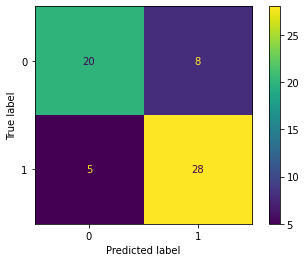

In [57]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

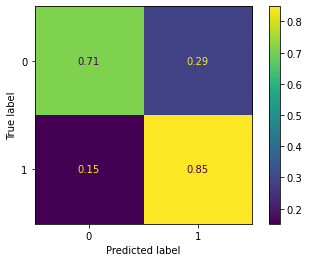

In [58]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

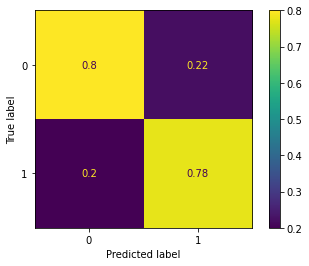

In [59]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='pred');

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



In [61]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       110
           1       0.85      0.89      0.87       131

    accuracy                           0.86       241
   macro avg       0.86      0.86      0.86       241
weighted avg       0.86      0.86      0.86       241



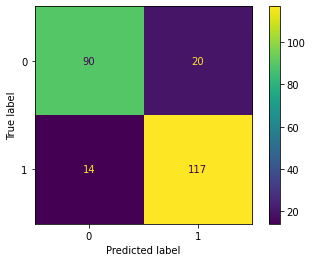

In [62]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

In [63]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [64]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[20  8]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Train_Set
[[ 90  20]
 [ 14 117]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       110
           1       0.85      0.89      0.87       131

    accuracy                           0.86       241
   macro avg       0.86      0.86      0.86       241
weighted avg       0.86      0.86      0.86       241



In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import SCORERS
list(SCORERS.keys())

In [67]:
model = LogisticRegression()

In [68]:
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision', 'recall', 'f1',  'accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.016,0.006,0.867,0.929,0.897,0.880
2,0.013,0.005,0.750,0.692,0.720,0.708
3,0.013,0.006,0.769,0.769,0.769,0.750
4,0.014,0.005,0.857,0.923,0.889,0.875
5,0.014,0.005,0.909,0.769,0.833,0.833
6,0.013,0.005,0.769,0.769,0.769,0.750
7,0.014,0.005,0.857,0.923,0.889,0.875
8,0.014,0.005,0.917,0.846,0.880,0.875
9,0.015,0.005,0.929,1.000,0.963,0.958
10,0.016,0.006,0.857,0.923,0.889,0.875


In [69]:
df_scores.mean()[2:]

test_precision   0.848
test_recall      0.854
test_f1          0.850
test_accuracy    0.838
dtype: float64

In [70]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[20  8]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Train_Set
[[ 90  20]
 [ 14 117]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       110
           1       0.85      0.89      0.87       131

    accuracy                           0.86       241
   macro avg       0.86      0.86      0.86       241
weighted avg       0.86      0.86      0.86       241



In [71]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
model = LogisticRegression()

In [75]:
penalty = ["l1", "l2"]                
C = np.logspace(-1, 5, 20)            
class_weight= ["balanced", None]      



solver = ["lbfgs", "liblinear", "sag", "saga"] 

In [76]:
param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",       
                          n_jobs = -1)   

In [77]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [78]:
grid_model.best_params_

{'C': 3.79269019073225,
 'class_weight': None,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [79]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[21  7]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set
[[ 90  20]
 [ 13 118]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       110
           1       0.86      0.90      0.88       131

    accuracy                           0.86       241
   macro avg       0.86      0.86      0.86       241
weighted avg       0.86      0.86      0.86       241



In [80]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve


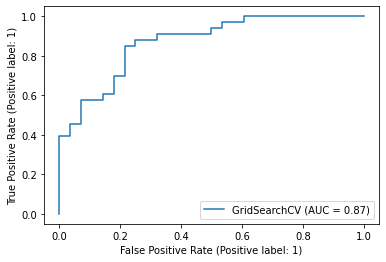

In [81]:
plot_roc_curve(grid_model, X_test_scaled, y_test);  


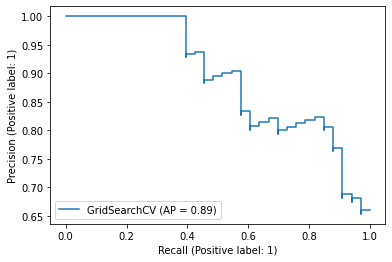

In [82]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);


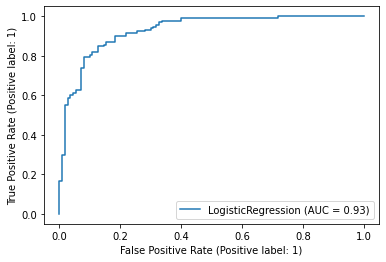

In [83]:
plot_roc_curve(log_model, X_train_scaled, y_train);  

In [86]:
y_pred_proba = log_model.predict_proba(X_train_scaled)


In [87]:
roc_auc_score(y_train, y_pred_proba[:,1]) 

0.9297709923664123

In [88]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])


In [89]:
fp_rate

array([0.        , 0.        , 0.        , 0.00909091, 0.00909091,
       0.01818182, 0.01818182, 0.02727273, 0.02727273, 0.03636364,
       0.03636364, 0.04545455, 0.04545455, 0.05454545, 0.05454545,
       0.07272727, 0.07272727, 0.08181818, 0.08181818, 0.1       ,
       0.1       , 0.10909091, 0.10909091, 0.12727273, 0.12727273,
       0.14545455, 0.14545455, 0.15454545, 0.15454545, 0.18181818,
       0.18181818, 0.21818182, 0.21818182, 0.25454545, 0.25454545,
       0.28181818, 0.28181818, 0.3       , 0.3       , 0.30909091,
       0.30909091, 0.31818182, 0.31818182, 0.32727273, 0.32727273,
       0.33636364, 0.33636364, 0.4       , 0.4       , 0.71818182,
       0.71818182, 1.        ])

In [90]:
tp_rate 

array([0.        , 0.00763359, 0.16793893, 0.16793893, 0.29770992,
       0.29770992, 0.54961832, 0.54961832, 0.58778626, 0.58778626,
       0.60305344, 0.60305344, 0.61068702, 0.61068702, 0.6259542 ,
       0.6259542 , 0.74045802, 0.74045802, 0.79389313, 0.79389313,
       0.80152672, 0.80152672, 0.81679389, 0.81679389, 0.84732824,
       0.84732824, 0.85496183, 0.85496183, 0.87022901, 0.87022901,
       0.90076336, 0.90076336, 0.91603053, 0.91603053, 0.92366412,
       0.92366412, 0.93129771, 0.93129771, 0.9389313 , 0.9389313 ,
       0.94656489, 0.94656489, 0.95419847, 0.95419847, 0.96946565,
       0.96946565, 0.97709924, 0.97709924, 0.99236641, 0.99236641,
       1.        , 1.        ])

In [91]:
optimal_idx = np.argmax(tp_rate - fp_rate)         
optimal_threshold = thresholds[optimal_idx]        
optimal_threshold


0.5874390374607978

# Implement KNN and Evaluate

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn_model = KNeighborsClassifier(n_neighbors=5)


In [94]:
knn_model.fit(X_train_scaled,y_train)


KNeighborsClassifier()

In [95]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [96]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [97]:
pd.DataFrame(y_pred_proba)


,0,1
0,0.800,0.200
1,0.800,0.200
2,1.000,0.000
3,0.200,0.800
4,0.600,0.400
...,...,...
56,0.400,0.600
57,0.000,1.000
58,1.000,0.000
59,1.000,0.000


In [98]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [99]:
pd.DataFrame.from_dict(my_dict).sample(10)


,Actual,Pred,Proba_1,Proba_0
188,0,0,0.400,0.600
281,0,0,0.400,0.600
100,1,1,0.600,0.400
95,1,0,0.200,0.800
197,0,0,0.200,0.800
130,1,1,1.000,0.000
239,0,0,0.000,1.000
142,1,1,1.000,0.000
202,0,0,0.000,1.000
268,0,0,0.200,0.800


In [100]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix


In [101]:
confusion_matrix(y_test, y_pred)


array([[19,  9],
       [ 8, 25]])

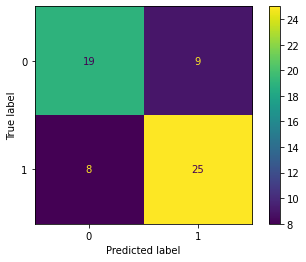

In [102]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);


In [103]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  9]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.74      0.76      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [104]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


In [105]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [106]:
test_error_rates


[0.34426229508196726,
 0.34426229508196726,
 0.3114754098360656,
 0.29508196721311475,
 0.2786885245901639,
 0.29508196721311475,
 0.2622950819672131,
 0.2622950819672131,
 0.2622950819672131,
 0.29508196721311475,
 0.2786885245901639,
 0.29508196721311475,
 0.29508196721311475,
 0.2786885245901639,
 0.24590163934426235,
 0.2622950819672131,
 0.24590163934426235,
 0.2786885245901639,
 0.2622950819672131,
 0.2786885245901639,
 0.24590163934426235,
 0.24590163934426235,
 0.21311475409836067,
 0.21311475409836067,
 0.2295081967213115,
 0.2295081967213115,
 0.24590163934426235,
 0.24590163934426235,
 0.2622950819672131]

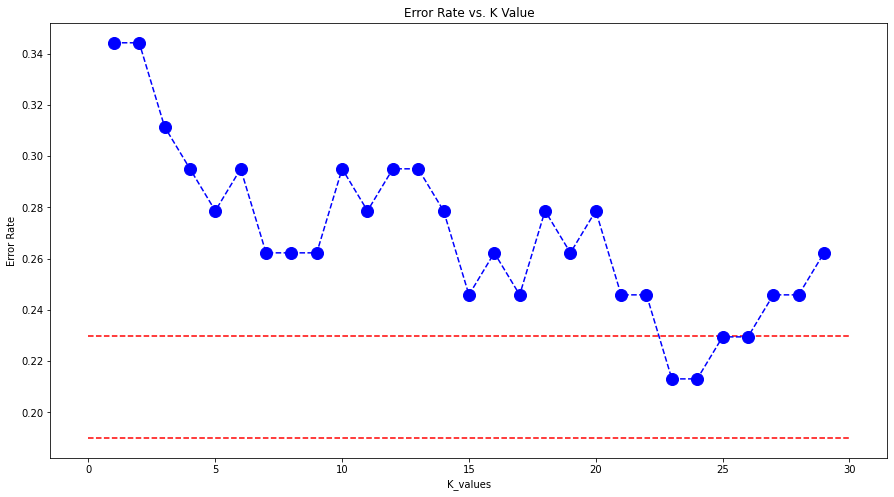

In [112]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=12)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.19, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.23, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

In [113]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [114]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train_scaled,y_train)
print('WITH K=8\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=8

Test_Set

[[20  8]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        28
           1       0.76      0.76      0.76        33

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61


Train_Set

[[ 98  12]
 [ 25 106]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.90      0.81      0.85       131

    accuracy                           0.85       241
   macro avg       0.85      0.85      0.85       241
weighted avg       0.85      0.85      0.85       241



In [115]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=15\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=15

Test_Set

[[21  7]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.78      0.76      0.77        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61


Train_Set

[[ 93  17]
 [ 24 107]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       110
           1       0.86      0.82      0.84       131

    accuracy                           0.83       241
   macro avg       0.83      0.83      0.83       241
weighted avg       0.83      0.83      0.83       241



In [116]:
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train_scaled,y_train)
print('WITH K=17\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=17

Test_Set

[[21  7]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.78      0.76      0.77        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61


Train_Set

[[ 94  16]
 [ 24 107]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.87      0.82      0.84       131

    accuracy                           0.83       241
   macro avg       0.83      0.84      0.83       241
weighted avg       0.84      0.83      0.83       241



In [117]:
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X_train_scaled,y_train)
print('WITH K=19\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=19

Test_Set

[[20  8]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        28
           1       0.76      0.76      0.76        33

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61


Train_Set

[[ 94  16]
 [ 22 109]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.87      0.83      0.85       131

    accuracy                           0.84       241
   macro avg       0.84      0.84      0.84       241
weighted avg       0.84      0.84      0.84       241



In [118]:
knn = KNeighborsClassifier(n_neighbors=21)

knn.fit(X_train_scaled,y_train)
print('WITH K=21\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=21

Test_Set

[[21  7]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.78      0.76      0.77        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61


Train_Set

[[ 92  18]
 [ 22 109]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       110
           1       0.86      0.83      0.84       131

    accuracy                           0.83       241
   macro avg       0.83      0.83      0.83       241
weighted avg       0.83      0.83      0.83       241



In [119]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train_scaled,y_train)
print('WITH K=23\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=23

Test_Set

[[21  7]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Train_Set

[[ 93  17]
 [ 21 110]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.87      0.84      0.85       131

    accuracy                           0.84       241
   macro avg       0.84      0.84      0.84       241
weighted avg       0.84      0.84      0.84       241



In [120]:
from sklearn.model_selection import cross_val_score, cross_validate

In [121]:
model = KNeighborsClassifier(n_neighbors=23)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002,0.008,0.920,0.875,1.000,0.933
2,0.001,0.008,0.708,0.800,0.615,0.696
3,0.001,0.007,0.667,0.667,0.769,0.714
4,0.001,0.007,0.917,0.867,1.000,0.929
5,0.001,0.007,0.833,0.909,0.769,0.833
6,0.001,0.007,0.708,0.714,0.769,0.741
7,0.001,0.007,0.917,0.923,0.923,0.923
8,0.001,0.007,0.875,0.917,0.846,0.880
9,0.001,0.007,0.792,0.900,0.692,0.783
10,0.001,0.007,0.875,0.857,0.923,0.889


In [122]:
df_scores.mean()[2:]

test_accuracy    0.821
test_precision   0.843
test_recall      0.831
test_f1          0.832
dtype: float64

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
knn_grid = KNeighborsClassifier()

In [125]:
k_values= range(1,30)

In [126]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [127]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [128]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [129]:
knn_grid_model.best_params_

{'n_neighbors': 17, 'p': 2, 'weights': 'uniform'}

In [130]:
print('WITH K=29\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=29

Test_Set

[[21  7]
 [ 8 25]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        28
           1       0.78      0.76      0.77        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61


Train_Set

[[ 94  16]
 [ 24 107]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.87      0.82      0.84       131

    accuracy                           0.83       241
   macro avg       0.83      0.84      0.83       241
weighted avg       0.84      0.83      0.83       241



In [131]:
knn_model = KNeighborsClassifier(n_neighbors=23).fit(X_train_scaled, y_train)

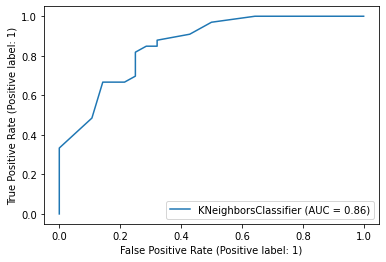

In [132]:
plot_roc_curve(knn_model, X_test_scaled, y_test);

# Visually compare models based on your chosen metric

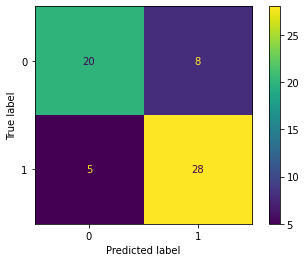

In [133]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

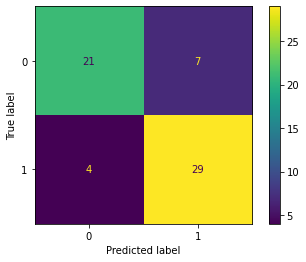

In [134]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

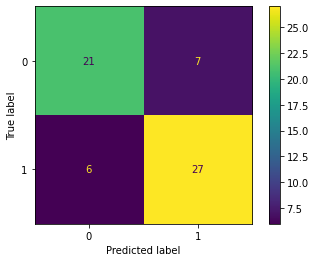

In [135]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [136]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[20  8]
 [ 5 28]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Train_Set

[[ 90  20]
 [ 14 117]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       110
           1       0.85      0.89      0.87       131

    accuracy                           0.86       241
   macro avg       0.86      0.86      0.86       241
weighted avg       0.86      0.86      0.86       241



In [137]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[21  7]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61


Train_Set

[[ 90  20]
 [ 13 118]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       110
           1       0.86      0.90      0.88       131

    accuracy                           0.86       241
   macro avg       0.86      0.86      0.86       241
weighted avg       0.86      0.86      0.86       241



In [138]:
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set

[[21  7]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        28
           1       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61


Train_Set

[[ 93  17]
 [ 21 110]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       110
           1       0.87      0.84      0.85       131

    accuracy                           0.84       241
   macro avg       0.84      0.84      0.84       241
weighted avg       0.84      0.84      0.84       241



# Chose best model and make a random prediction 

In [139]:
import pickle

In [140]:
scaler = StandardScaler()

In [141]:
scaler.fit(X)

StandardScaler()

In [142]:
pickle.dump(scaler, open('scaler_knn_heart.pkl', 'wb'))

In [143]:
X_scaled = scaler.transform(X)

In [144]:
final_knn_model = KNeighborsClassifier(n_neighbors=23)

In [145]:
pickle.dump(final_knn_model, open('knn_final_heart.pkl', 'wb'))

In [146]:
loaded_scaler = pickle.load(open('scaler_knn_heart.pkl', 'rb'))

In [147]:
loaded_model = pickle.load(open('knn_final_heart.pkl', 'rb'))

In [148]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [149]:
X.sample(10)

,age,sex,trestbps,chol,thalach,oldpeak,ca,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
277,57,1,124,261,141,0.300,0,1,0,0,0,1,0,0,0,1,0,0,1
76,51,1,125,245,166,2.400,0,0,1,0,1,0,0,0,1,0,0,1,0
199,65,1,110,248,158,0.600,2,0,0,0,0,0,0,0,0,1,1,0,0
179,57,1,150,276,112,0.600,1,0,0,0,0,0,0,1,1,0,1,0,0
27,51,1,110,175,123,0.600,0,0,1,0,0,1,0,0,0,1,0,1,0
121,59,1,138,271,182,0.000,0,0,0,0,0,0,0,0,0,1,0,1,0
91,57,1,132,207,168,0.000,0,0,0,0,0,1,0,1,0,1,0,0,1
242,64,1,145,212,132,2.000,2,0,0,0,0,0,0,0,1,0,1,0,0
281,52,1,128,204,156,1.000,0,0,0,0,1,1,0,1,1,0,0,0,0
100,42,1,148,244,178,0.800,2,0,0,1,0,0,0,0,0,1,0,1,0


In [150]:
new_obs = {'age': [15, 20 ,38, 42, 56, 75, 82, 12, 34, 59],
           'trestbps': [120, 131, 136, 140, 120, 150, 175, 172, 192, 100],
           'chol': [130, 148, 154, 196, 306, 448, 211, 346, 460, 500],
           'thalach': [80, 200, 158, 95, 78, 186, 195, 148, 200, 98],
           'oldpeak': [3.3, 4.5, 0.7, 2.4, 3.7, 4.2, 5.7, 0.7, 6.1, 1.0],
           'ca' : [2.0, 1.0, 4.0, 0.0, 4.0, 3.0, 2.0, 3.0, 1.0, 0.0],
           'sex_1': [0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0],
           'cp_1': [1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
           'cp_2': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0],
           'cp_3': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
           'fbs_1': [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
           'restecg_1': [1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
           'restecg_2': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0],
           'exang_1': [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0],
           'slope_1': [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0],
           'slope_2': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
           'thal_1': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0],
           'thal_2': [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
           'thal_3': [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0]}

In [151]:
samples = pd.DataFrame(new_obs)
samples

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,15,120,130,80,3.300,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1,20,131,148,200,4.500,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000
2,38,136,154,158,0.700,4.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000
3,42,140,196,95,2.400,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
4,56,120,306,78,3.700,4.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000
5,75,150,448,186,4.200,3.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
6,82,175,211,195,5.700,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
7,12,172,346,148,0.700,3.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000
8,34,192,460,200,6.100,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
9,59,100,500,98,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000


In [152]:
samples_scaled = loaded_scaler.transform(samples)
samples_scaled

array([[-4.36406832e+00,  2.56237830e+02, -9.14008412e-02,
        -3.22251414e+00, -6.39693205e+00,  8.25296017e-01,
        -7.14911244e-01,  2.24499443e+00, -6.30989816e-01,
        -2.87118923e-01, -4.18446264e-01,  1.00000000e+00,
        -1.15856889e-01, -6.98344277e-01,  1.07570575e+00,
        -9.35829257e-01, -2.51754407e-01,  9.11209652e-01,
        -7.95256206e-01],
       [-3.81054096e+00,  2.79860577e+02,  9.35159020e-01,
        -8.99981425e-01, -6.34445142e+00, -3.71240423e-02,
        -7.14911244e-01,  2.24499443e+00, -6.30989816e-01,
        -2.87118923e-01,  2.38979311e+00, -1.00000000e+00,
         8.63133825e+00,  1.43195847e+00,  1.07570575e+00,
        -9.35829257e-01, -2.51754407e-01, -1.09744228e+00,
         1.25745639e+00],
       [-1.81784249e+00,  2.90598189e+02,  1.27734564e+00,
        -1.71286787e+00, -6.51064010e+00,  2.55013614e+00,
         2.80034358e-01, -4.45435403e-01,  1.58481163e+00,
        -2.87118923e-01,  2.38979311e+00,  1.00000000e+00,
    

In [153]:
loaded_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=23)

In [154]:
predictions = loaded_model.predict(samples_scaled)
predictions_proba = loaded_model.predict_proba(samples_scaled)

In [155]:
samples["pred"] = predictions


In [156]:
samples["pred_proba_1"] = predictions_proba[:,1]


In [157]:
samples["pred_proba_0"] = predictions_proba[:,0]
samples

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3,pred,pred_proba_1,pred_proba_0
0,15,120,130,80,3.300,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0,0.261,0.739
1,20,131,148,200,4.500,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000,0,0.087,0.913
2,38,136,154,158,0.700,4.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0,0.043,0.957
3,42,140,196,95,2.400,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0,0.348,0.652
4,56,120,306,78,3.700,4.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0,0.217,0.783
5,75,150,448,186,4.200,3.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0,0.261,0.739
6,82,175,211,195,5.700,2.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0,0.217,0.783
7,12,172,346,148,0.700,3.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,0,0.174,0.826
8,34,192,460,200,6.100,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0,0.261,0.739
9,59,100,500,98,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0,0.217,0.783
